In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(49.19532048937211, -145.91426092595592),
 (-67.86012897433608, 80.44263275073064),
 (-30.898959807310987, 0.4856722888834213),
 (-80.44214243570208, -169.05985660368694),
 (-48.0885020292731, 56.54455866868636),
 (-15.899596379949244, -7.1564161266647375),
 (26.11828128622939, -91.7409501853223),
 (85.60103994117642, 126.70855956406677),
 (50.507524592568416, 101.55968854414738),
 (-27.88884185898005, 103.6379861421529),
 (-53.418935987077155, -76.2232994159109),
 (72.30063495850848, 6.470471333787231),
 (82.51640154718922, -84.66071358204644),
 (60.493606509354606, -85.14274849016168),
 (27.071257490350035, 49.403223106270275),
 (59.50573938643734, -60.13493518536302),
 (22.66704124612005, 2.4148856995157075),
 (-46.1117519881666, -68.70846108946373),
 (29.913859155770098, -113.26692506776793),
 (27.67023931879467, -4.267958381965684),
 (84.45503529520104, 53.22651329595476),
 (75.55990499300316, 46.05799199535406),
 (46.74829415324501, 65.04723529299343),
 (-66.15995524665877, 149.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d12907c426d5c0b2ca805d294a0aa664


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 19 of Set 25 | kodiak
Processing Record 20 of Set 25 | busselton
Processing Record 21 of Set 25 | luderitz
Processing Record 22 of Set 25 | vaini
Processing Record 23 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 24 of Set 25 | jamestown
Processing Record 25 of Set 25 | morgan city
Processing Record 26 of Set 25 | tiksi
Processing Record 27 of Set 25 | kyren
Processing Record 28 of Set 25 | carnarvon
Processing Record 29 of Set 25 | punta arenas
Processing Record 30 of Set 25 | sorland
Processing Record 31 of Set 25 | qaanaaq
Processing Record 32 of Set 25 | attawapiskat
City not found. Skipping...
Processing Record 33 of Set 25 | safwah
City not found. Skipping...
Processing Record 34 of Set 25 | saint-augustin
Processing Record 35 of Set 25 | tessalit
Processing Record 36 of Set 25 | comodoro rivadavia
Processing Record 37 of Set 25 | caborca
Processing Record 38 of Set 25 | adrar
Processing Record 39 of Set 25 | belushya guba
City not found. S

Processing Record 34 of Set 28 | port-gentil
Processing Record 35 of Set 28 | katangli
Processing Record 36 of Set 28 | coihaique
Processing Record 37 of Set 28 | ancud
Processing Record 38 of Set 28 | cherskiy
Processing Record 39 of Set 28 | auki
Processing Record 40 of Set 28 | gannan
Processing Record 41 of Set 28 | baillif
Processing Record 42 of Set 28 | manaure
Processing Record 43 of Set 28 | vostok
Processing Record 44 of Set 28 | lata
Processing Record 45 of Set 28 | raudeberg
Processing Record 46 of Set 28 | zlatoustovsk
City not found. Skipping...
Processing Record 47 of Set 28 | leningradskiy
Processing Record 48 of Set 28 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 28 | george
Processing Record 50 of Set 28 | wajima
Processing Record 1 of Set 29 | nishihara
Processing Record 2 of Set 29 | qujing
Processing Record 3 of Set 29 | aklavik
Processing Record 4 of Set 29 | kununurra
Processing Record 5 of Set 29 | tulsipur
Processing Record 6 of Set 29 | p

Processing Record 21 of Set 32 | athabasca
Processing Record 22 of Set 32 | zeya
Processing Record 23 of Set 32 | sao filipe
Processing Record 24 of Set 32 | baykalovo
Processing Record 25 of Set 32 | north adams
Processing Record 26 of Set 32 | kutum
Processing Record 27 of Set 32 | oranjemund
Processing Record 28 of Set 32 | carupano
Processing Record 29 of Set 32 | clyde river
Processing Record 30 of Set 32 | pemba
Processing Record 31 of Set 32 | grimari
City not found. Skipping...
Processing Record 32 of Set 32 | clinton
Processing Record 33 of Set 32 | hamilton
Processing Record 34 of Set 32 | yerbogachen
Processing Record 35 of Set 32 | dubai
Processing Record 36 of Set 32 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 32 | kavieng
Processing Record 38 of Set 32 | arteaga
Processing Record 39 of Set 32 | sakakah
Processing Record 40 of Set 32 | yilan
Processing Record 41 of Set 32 | mezen
Processing Record 42 of Set 32 | skopelos
Processing Record 43 of Se

Processing Record 7 of Set 36 | wembley
Processing Record 8 of Set 36 | faizpur
Processing Record 9 of Set 36 | normandin
Processing Record 10 of Set 36 | mao
Processing Record 11 of Set 36 | oussouye
Processing Record 12 of Set 36 | alofi
Processing Record 13 of Set 36 | vaitape
Processing Record 14 of Set 36 | samusu
City not found. Skipping...
Processing Record 15 of Set 36 | overyata
Processing Record 16 of Set 36 | baykit
Processing Record 17 of Set 36 | aswan
Processing Record 18 of Set 36 | alice springs
Processing Record 19 of Set 36 | onverwacht
Processing Record 20 of Set 36 | haines junction
Processing Record 21 of Set 36 | karpuninskiy
City not found. Skipping...
Processing Record 22 of Set 36 | moree
Processing Record 23 of Set 36 | port hardy
Processing Record 24 of Set 36 | yokote
Processing Record 25 of Set 36 | arlit
Processing Record 26 of Set 36 | fare
Processing Record 27 of Set 36 | honiara
Processing Record 28 of Set 36 | wiang sa
Processing Record 29 of Set 36 | 

In [14]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,46.65,98,100,10.07,US,2021-06-10 21:24:16
1,Busselton,-33.6500,115.3333,57.47,78,55,4.63,AU,2021-06-10 21:24:17
2,Luderitz,-26.6481,15.1594,57.52,69,3,1.43,NA,2021-06-10 21:24:17
3,Vaini,-21.2000,-175.2000,75.36,73,20,10.36,TO,2021-06-10 21:24:17
4,Jamestown,42.0970,-79.2353,84.09,63,3,10.54,US,2021-06-10 21:23:54
5,Morgan City,29.6994,-91.2068,92.03,62,18,9.66,US,2021-06-10 21:24:18
6,Tiksi,71.6872,128.8694,36.03,85,100,2.73,RU,2021-06-10 21:24:18
7,Kyren,51.6828,102.1408,51.48,93,100,3.96,RU,2021-06-10 21:24:18
8,Carnarvon,-24.8667,113.6333,60.87,100,75,3.44,AU,2021-06-10 21:24:19
9,Punta Arenas,-53.1500,-70.9167,37.51,81,90,6.91,CL,2021-06-10 21:24:19


In [17]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-06-10 21:24:16,57.7900,-152.4072,46.65,98,100,10.07
1,Busselton,AU,2021-06-10 21:24:17,-33.6500,115.3333,57.47,78,55,4.63
2,Luderitz,NA,2021-06-10 21:24:17,-26.6481,15.1594,57.52,69,3,1.43
3,Vaini,TO,2021-06-10 21:24:17,-21.2000,-175.2000,75.36,73,20,10.36
4,Jamestown,US,2021-06-10 21:23:54,42.0970,-79.2353,84.09,63,3,10.54
5,Morgan City,US,2021-06-10 21:24:18,29.6994,-91.2068,92.03,62,18,9.66
6,Tiksi,RU,2021-06-10 21:24:18,71.6872,128.8694,36.03,85,100,2.73
7,Kyren,RU,2021-06-10 21:24:18,51.6828,102.1408,51.48,93,100,3.96
8,Carnarvon,AU,2021-06-10 21:24:19,-24.8667,113.6333,60.87,100,75,3.44
9,Punta Arenas,CL,2021-06-10 21:24:19,-53.1500,-70.9167,37.51,81,90,6.91


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

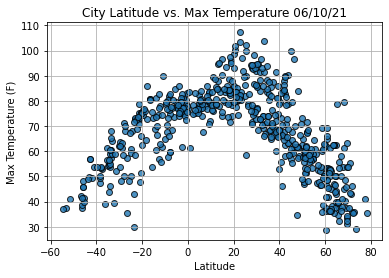

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

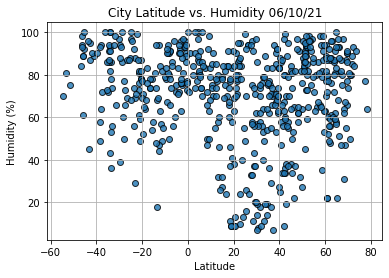

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

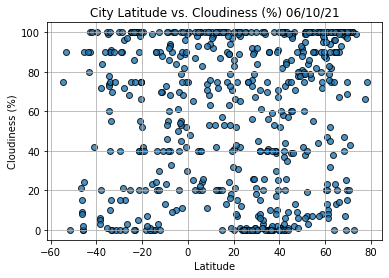

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

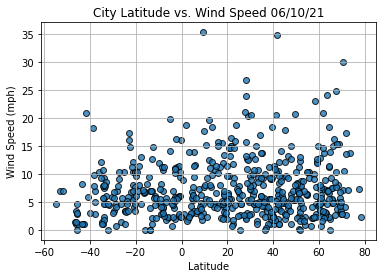

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-06-10 21:24:16,57.7900,-152.4072,46.65,98,100,10.07
4,Jamestown,US,2021-06-10 21:23:54,42.0970,-79.2353,84.09,63,3,10.54
5,Morgan City,US,2021-06-10 21:24:18,29.6994,-91.2068,92.03,62,18,9.66
6,Tiksi,RU,2021-06-10 21:24:18,71.6872,128.8694,36.03,85,100,2.73
7,Kyren,RU,2021-06-10 21:24:18,51.6828,102.1408,51.48,93,100,3.96


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

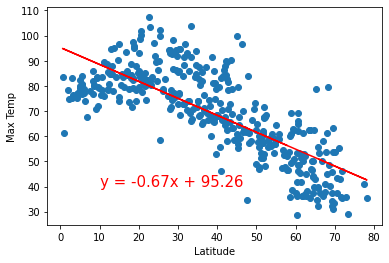

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

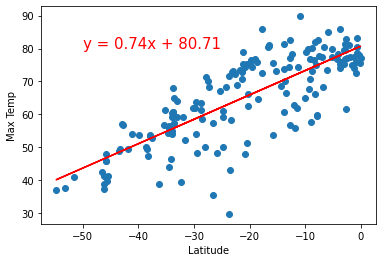

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

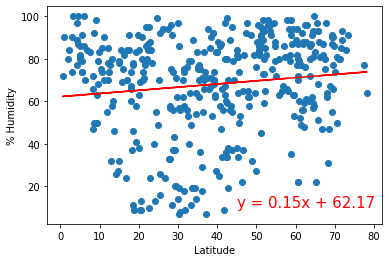

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

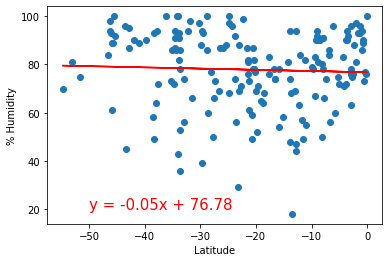

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

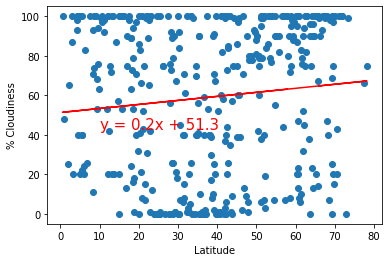

In [44]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,43))

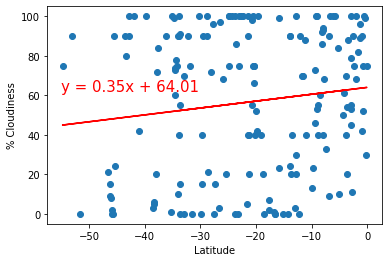

In [50]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,62))

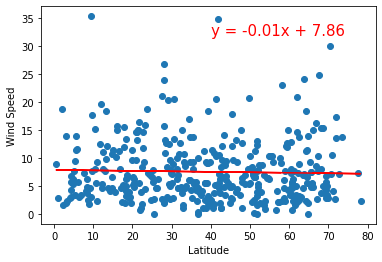

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,32))

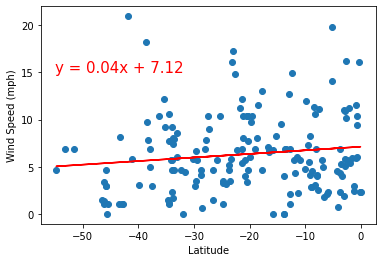

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-55,15))